# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anggasta Aji Azhari
- **Email:** anggaazhari12@gmail.com
- **ID Dicoding:** anggastaa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan waktu puncak aktivitas pengguna rental sepeda?
- Pertanyaan 2 : Apakah ada perbedaan pola pengguna rental sepeda di hari kerja dan akhir pekan?
- Pertanyaan 3 : Apakah musim mempengaruhi jumlah pengguna rental sepeda?
- Pertanyaan 4 : Bagaimana cuaca bisa mempengaruhi jumlah pengguna rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar
!pip install unidecode
from datetime import datetime

from google.colab import drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/Bike-sharing-dataset/'
df_hour = pd.read_csv(os.path.join(dir, 'hour.csv'))
df_day = pd.read_csv(os.path.join(dir, 'day.csv'))

In [ ]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
print('Duplicated DataFrame Day:')
print(df_day.duplicated().sum())

print("Duplicated DataFrame Hour:")
print(df_hour.duplicated().sum())

print('Missing Value DataFrame Hari:')
print(df_day.isna().sum())

print('Missing Value DataFrame Jam:')
print(df_hour.isna().sum())

Duplicated DataFrame Day:
0
Duplicated DataFrame Hour:
0
Missing Value DataFrame Hari:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing Value DataFrame Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dataset Bike Sharing bersih dari duplikasi dan juga missing value

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


=========================================
Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Cleaning Data

Mendekode atau mengubah data dari format yang kurang terbaca pada beberapa kolom menjadi format yang lebih mudah dipahami dan dianalisa.

In [ ]:
# Dekode season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)
df_hour['season'] = df_hour['season'].map(season_map)

# Dekode year
year_map = {0: '2011', 1: '2012'}
df_day['yr'] = df_day['yr'].map(year_map)
df_hour['yr'] = df_hour['yr'].map(year_map)

# Dekode weathersit
weather_map = {
               1: 'Clear/Few Clouds', 2: 'Mist/Cloudy',
               3: 'Light Snow/Light Rain', 4: 'Heavy Rain/Snow'
}
df_day['weathersit'] = df_day['weathersit'].map(weather_map)
df_hour['weathersit'] = df_hour['weathersit'].map(weather_map)

# Dekode month
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df_day['mnth'] = df_day['mnth'].map(month_map)
df_hour['mnth'] = df_hour['mnth'].map(month_map)

# Dekode weekday
weekday_map = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday', 0: 'Sunday'
}
df_day['weekday'] = df_day['weekday'].map(weekday_map)
df_hour['weekday'] = df_hour['weekday'].map(weekday_map)

# Dekode workingday
workingday_map = {
    1: 'Working Day',
    0: 'Weekend/Holiday'
}
df_day['workingday'] = df_day['workingday'].map(workingday_map)
df_hour['workingday'] = df_hour['workingday'].map(workingday_map)


Drop kolom instant dan holiday karena sudah terwakili oleh kolom workingday

In [ ]:
df_day = df_day.drop(['instant', 'holiday'], axis=1)
df_hour = df_hour.drop(['instant', 'holiday'], axis=1)


## Exploratory Data Analysis (EDA)

### Explore dataset hour


In [ ]:
df_hour.head()

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,Saturday,Weekend/Holiday,Clear/Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,Saturday,Weekend/Holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,Saturday,Weekend/Holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,Saturday,Weekend/Holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,Saturday,Weekend/Holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df_hour.describe(include="all")

,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Fall,2012,May,NaN,Saturday,Working Day,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan rangkuman statistik datasset hour diatas, dapat dilihat bahwa pelanggan rata-rata menggunakan rental sepeda sekitar pukul 11.54

#####Jumlah pelanggan rental setiap jam

In [ ]:
df_hour.groupby(by="hr").agg({"dteday": "nunique","cnt": ["max", "min", "mean", "sum"]})

dteday  cnt                        
   nunique  max min        mean     sum
hr                                     
0      726  283   2   53.898072   39130
1      724  168   1   33.375691   24164
2      715  132   1   22.869930   16352
3      697   79   1   11.727403    8174
4      697   28   1    6.352941    4428
5      717   66   1   19.889819   14261
6      725  213   1   76.044138   55132
7      727  596   1  212.064649  154171
8      727  839   5  359.011004  261001
9      727  426  14  219.309491  159438
10     727  539   8  173.668501  126257
11     727  663  10  208.143054  151320
12     728  776   3  253.315934  184414
13     729  760  11  253.661180  184919
14     729  750  12  240.949246  175652
15     729  750   7  251.233196  183149
16     730  783  11  311.983562  227748
17     730  976  15  461.452055  336860
18     728  977  23  425.510989  309772
19     728  743  11  311.523352  226789
20     728  567  11  226.030220  164550
21     728  584   6  172.314560  125445
22     728  502   9  131.335165   95612
23     728  256   2   87.831044   63941

berdasarkan hasil agregasi tabel diatas, dapat dilihat bahwa sekitar pukul 17.00 merupakan jam dengan jumlah pelanggan rental tertinggi

### Explore dataset day

In [ ]:
df_day.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,Saturday,Weekend/Holiday,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,January,Sunday,Weekend/Holiday,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,January,Monday,Working Day,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,January,Tuesday,Working Day,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,January,Wednesday,Working Day,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_day.describe(include="all")

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,Fall,2012,January,Saturday,Working Day,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#####Jumlah pengguna rental sepeda berdasarkan hari

In [ ]:
weekday_agg = df_day.groupby('weekday').agg({
    'cnt': ['mean', 'sum', 'min', 'max']
}).reset_index()

weekday_agg.columns = ['Weekday', 'Mean', 'Sum', 'Min', 'Max']

weekday_agg

,Weekday,Mean,Sum,Min,Max
0,Friday,4690.288462,487790,1167,8362
1,Monday,4338.123810,455503,22,7525
2,Saturday,4550.542857,477807,627,8714
3,Sunday,4228.828571,444027,605,8227
4,Thursday,4667.259615,485395,431,7804
5,Tuesday,4510.663462,469109,683,7767
6,Wednesday,4548.538462,473048,441,8173


Berdasarkan hasil diatas, dapat dilihat bahwa hari jumat merupakan hari yang memiliki jumlah pelanggan terbanyak dengan nilai 487790. Sementara hari sabtu pernah menjadi hari tersibuk karena jumlah pelanggan pernah mencapai 8714 dalam sehari.

#####jumlah pengguna rental sepeda berdasarkan musim

In [ ]:
df_day.groupby(['season', 'weekday']).agg(
    total_rentals=('cnt', 'sum'),
    avg_rentals=('cnt', 'mean')
)

total_rentals  avg_rentals
season weekday                              
Fall   Friday            155267  5750.629630
       Monday            146307  5627.192308
       Saturday          150794  5584.962963
       Sunday            138431  5324.269231
       Thursday          159561  5698.607143
       Tuesday           152715  5656.111111
       Wednesday         158054  5853.851852
Spring Friday             74264  2856.307692
       Monday             63771  2452.730769
       Saturday           65673  2432.333333
       Sunday             60195  2229.444444
       Thursday           72355  2894.200000
       Tuesday            69813  2792.520000
       Wednesday          65277  2611.080000
Summer Friday            135792  5222.769231
       Monday            123255  4565.000000
       Saturday          138689  5334.192308
       Sunday            129650  4986.538462
       Thursday          135207  5200.269231
       Tuesday           125449  4824.961538
       Wednesday         130547  4835.074074
Winter Friday            122467  4898.680000
       Monday            122170  4698.846154
       Saturday          122651  4906.040000
       Sunday            115751  4451.961538
       Thursday          118272  4730.880000
       Tuesday           121132  4658.923077
       Wednesday         119170  4766.800000

In [ ]:
# Agregasi berdasarkan musim
season_agg = df_day.groupby('season').agg({
    'dteday': 'nunique',
    'cnt': ['mean', 'sum', 'min', 'max']
})
season_agg

dteday          cnt                     
       nunique         mean      sum   min   max
season                                          
Fall       188  5644.303191  1061129  1115  8714
Spring     181  2604.132597   471348   431  7836
Summer     184  4992.331522   918589   795  8362
Winter     178  4728.162921   841613    22  8555

Berdasarkan hasil 2 tabel agregasi diatas, musim semi merupakan musim dengan jumlah pengguna rental sepeda paling sedikit dibanding 3 musim lainnya. Sedangkan musim gugur merupakan musim paling sibuk.

#####perbandingan jumlah pelanggan pada weekend dan workday

In [ ]:
df_day.groupby('workingday').agg({
    "casual": ["sum"],
    "registered": ["sum"],
    "cnt" : ["mean", "sum"]
})


casual registered          cnt         
                    sum        sum         mean      sum
workingday                                              
Weekend/Holiday  316732     683537  4330.168831  1000269
Working Day      303285    1989125  4584.820000  2292410

Hasil diatas menunjukkan bahwa lebih sering menggunakan rental sepeda pada hari kerja

In [ ]:
df_day.groupby(by=["yr", "mnth"]).agg({
    "dteday": "nunique",
    "cnt": ["max", "min", "mean", "sum"]
})

dteday   cnt                           
               nunique   max   min         mean     sum
yr   mnth                                              
2011 April          30  5312   795  3162.333333   94870
     August         31  5895  1115  4409.387097  136691
     December       31  3940   705  2816.870968   87323
     February       28  2927  1005  1721.964286   48215
     January        31  1985   431  1231.903226   38189
     July           31  6043  3285  4559.387097  141341
     June           30  5515  3767  4783.733333  143512
     March          31  3239   605  2065.967742   64045
     May            31  5805  2633  4381.322581  135821
     November       30  4486  1495  3405.566667  102167
     October        31  5511   627  3984.225806  123511
     September      30  5423  1842  4247.266667  127418
2012 April          30  7460  1027  5807.466667  174224
     August         31  7865  4549  6919.451613  214503
     December       31  6606   441  3990.741935  123713
     February       29  5062  1529  3556.448276  103137
     January        31  4521  1301  3120.774194   96744
     July           31  8173  4459  6567.967742  203607
     June           30  8120  4127  6761.000000  202830
     March          31  8362  3194  5318.548387  164875
     May            31  8294  2843  6318.225806  195865
     November       30  6852  2277  5088.800000  152664
     October        31  8156    22  6414.225806  198841
     September      30  8714  4073  7285.766667  218573

Bisa dilihat dari hasil diatas bahwa bulan september tahun 2012 memiliki jumlah pengguna rental terbanyak dengan 218.573. Sedangkan pada tahun 2011, bulan juni merupakan bulan dengan jumlah pengguna rental terbanyak dengan 143.512

#####perbandingan jumlah pengguna rental sepeda berdasarkan kondisi cuaca

In [ ]:
weather_agg = df_day.groupby('weathersit').agg({
    'cnt': ['mean', 'sum', 'min', 'max']
})

weather_agg.columns = ['Total_Mean', 'Total_Sum', 'Total_Min', 'Total_Max']

weather_agg

,Total_Mean,Total_Sum,Total_Min,Total_Max
weathersit,,,,
Clear/Few Clouds,4876.786177,2257952,431,8714
Light Snow/Light Rain,1803.285714,37869,22,4639
Mist/Cloudy,4035.862348,996858,605,8362


Hasil diatas menunjukkan bahwa pengguna rental sepeda lebih sering menggunakan rental pada cuaca cerah dengan beberapa awan dibanding pada cuaca mendung atau hujan ringan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu puncak aktivitas pengguna rental sepeda?

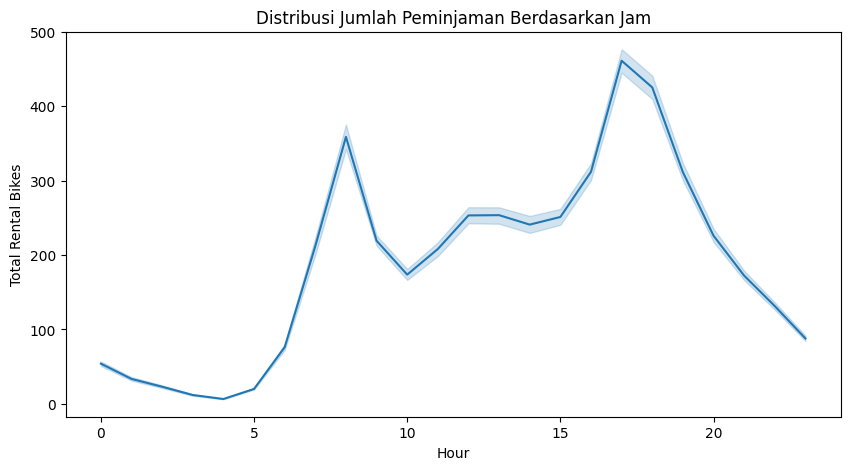

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=df_hour)
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Jam')
plt.xlabel('Hour')
plt.ylabel('Total Rental Bikes')
plt.show()

In [ ]:
hour = df_hour.groupby('hr')[['registered','casual']].mean()
fig = px.line(hour, x=hour.index, y=['registered','casual'], title='Distribusi Rata-Rata Pengguna Registered dan Casual Berdasarkan Jam')
fig.show();

Berdasarkan grafik diatas, pengguna casual jauh lebih sedikit dibanding registered serta rata-rata pengguna akan menggunakan rental sepeda pada puncaknya sekitar pukul 08.00 dan akan naik lagi pada sekitar pukul 17.00 hingga 18.00

### Pertanyaan 2: Apakah ada perbedaan pola pengguna rental sepeda di hari kerja dan akhir pekan?

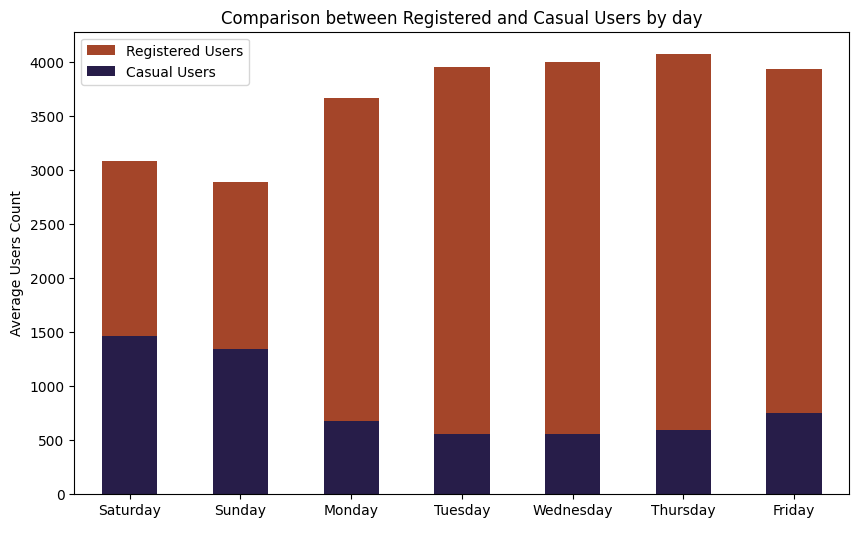

In [ ]:

plt.figure(figsize=(10, 6))

sns.barplot(x='weekday', y='registered', data=df_day, label='Registered Users', color='#B83A14', width=0.5, errorbar=None)
sns.barplot(x='weekday', y='casual', data=df_day, label='Casual Users', color='#231650', width=0.5, errorbar=None)

plt.title('Comparison between Registered and Casual Users by day')
plt.xlabel(' ')
plt.ylabel('Average Users Count')

plt.legend()
plt.show()

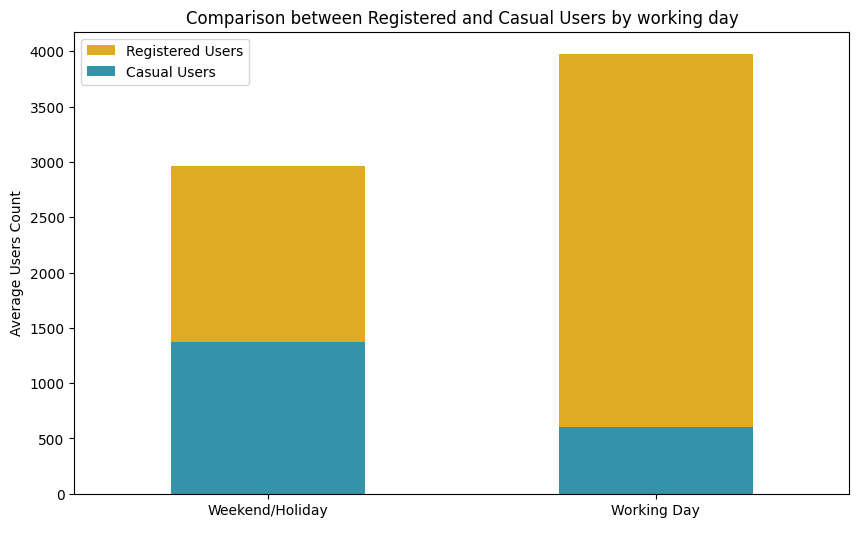

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='workingday', y='registered', data=df_day, label='Registered Users', color='#ffb703', width=0.5, errorbar=None)
sns.barplot(x='workingday', y='casual', data=df_day, label='Casual Users', color='#219ebc', width=0.5, errorbar=None)

plt.title('Comparison between Registered and Casual Users by working day')

plt.xlabel(' ')
plt.ylabel('Average Users Count')

plt.legend()
plt.show()


Dari grafik diatas dapat dilihat bahwa registered user masih jauh lebih banyak dibanding casual user. Terlihat juga bahwa hari weekend seperti sabtu dan minggu memiliki jumlah user yang lebih sedikit dibanding hari-hari biasa namun casual user lebih banyak pada hari weekend atau hari libur.

### Pertanyaan 3:  Apakah musim mempengaruhi jumlah pengguna rental sepeda?

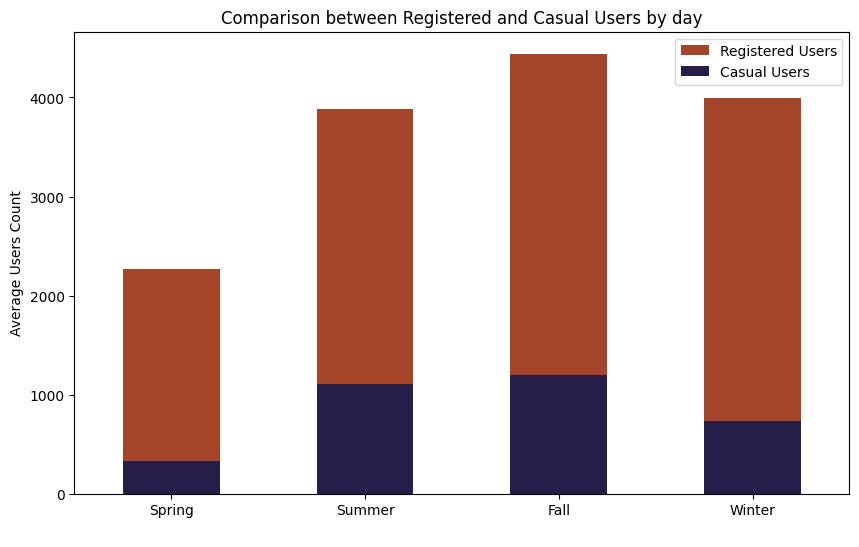

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='season', y='registered', data=df_day, label='Registered Users', color='#B83A14', width=0.5, errorbar=None)
sns.barplot(x='season', y='casual', data=df_day, label='Casual Users', color='#231650', width=0.5, errorbar=None)

plt.title('Comparison between Registered and Casual Users by day')
plt.xlabel(' ')
plt.ylabel('Average Users Count')

plt.legend()
plt.show()

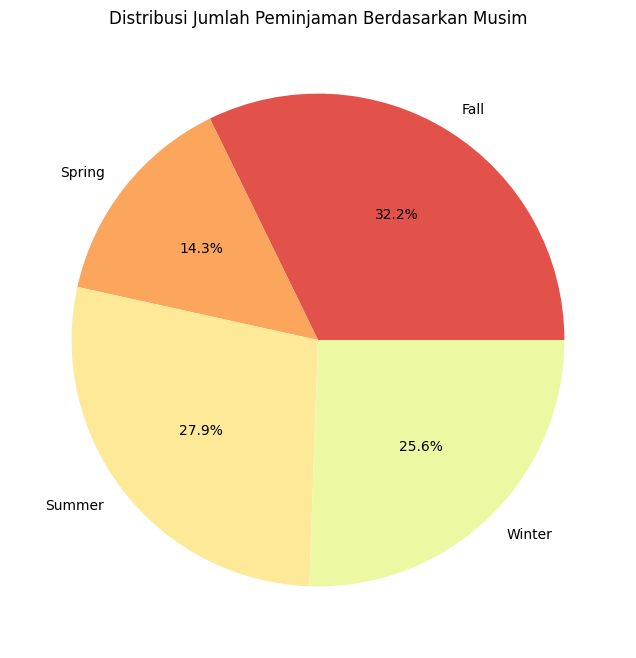

In [ ]:
season_total = df_day.groupby('season')['cnt'].sum()


plt.figure(figsize=(8, 8))
plt.pie(season_total, labels=season_total.index , autopct='%1.1f%%', colors=sns.color_palette('Spectral'))


plt.title('Distribusi Jumlah Peminjaman Berdasarkan Musim')


plt.show()

berdasarkan grafik diatas, musim gugur merupakan musim yang memiliki jumlah pelanggan terbanyak dan musim semi merupakan musim yang memiliki paling sedikit jumlah pelanggan.

### Pertanyaan 4: Bagaimana cuaca bisa mempengaruhi jumlah pengguna rental sepeda?

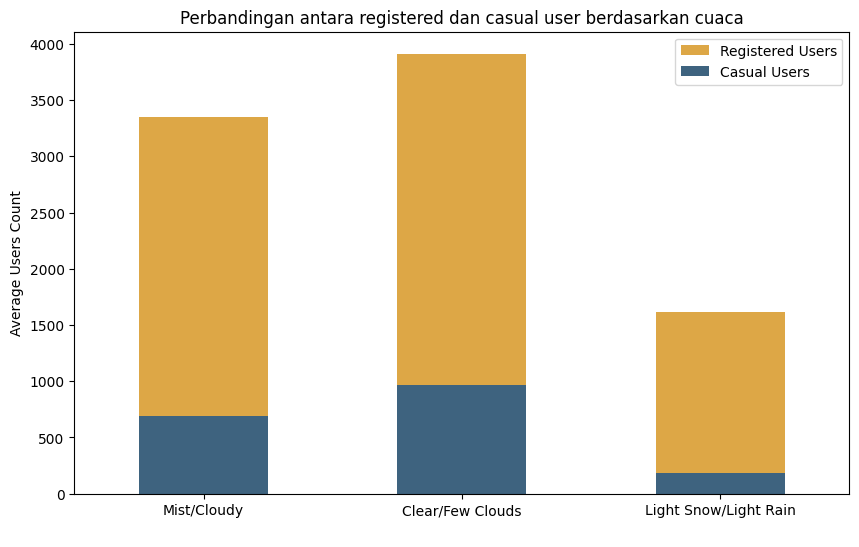

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='weathersit', y='registered', data=df_day, label='Registered Users', color='#f6ae2d', width=0.5, errorbar=None)
sns.barplot(x='weathersit', y='casual', data=df_day, label='Casual Users', color='#33658A', width=0.5, errorbar=None)

plt.title('Perbandingan antara registered dan casual user berdasarkan cuaca')

plt.xlabel(' ')
plt.ylabel('Average Users Count')

plt.legend()
plt.show()

Berdasarkan grafik diatas, pengguna cenderung lebih gemar menggunakan rental sepeda pada cuaca cerah atau sedikit berawan. Ketika cuaca hujan jumlah pengguna rental sepeda sangat menurun.

## Analisis Lanjutan (Opsional)

## Conclusion

- Puncak penggunaan rental sepeda terjadi pada jam 08.00 (kemungkinan untuk berangkat kerja) dan kembali meningkat antara jam 17.00 hingga 18.00 (kemungkinan waktu pulang kerja). Ini menunjukkan bahwa rental sepeda digunakan sebagai moda transportasi pada waktu keberangkatan dan kepulangan kativitas harian.
- Pada akhir pekan seperti Sabtu dan Minggu, terdapat penurunan jumlah pengguna secara keseluruhan dibandingkan dengan hari kerja. Namun, penggunaan sepeda oleh pengguna casual meningkat pada akhir pekan dan hari libur, menunjukkan bahwa pengguna casual lebih memanfaatkan rental sepeda untuk rekreasi dibandingkan dengan keperluan harian.
- Musim gugur adalah musim dengan jumlah pelanggan terbanyak, sementara musim semi memiliki pelanggan paling sedikit. Ini menunjukkan adanya variasi musiman dalam penggunaan, yang mungkin dipengaruhi oleh kenyamanan cuaca atau pergeseran kebiasaan pengguna.
- Pengguna lebih memilih menggunakan sepeda ketika cuaca cerah atau sedikit berawan. Ketika cuaca memburuk, seperti pada saat hujan atau salju, jumlah pengguna rental sepeda menurun drastis, menunjukkan bahwa kenyamanan dan keamanan cuaca memiliki dampak signifikan terhadap tingkat penggunaan.

In [ ]:
df_day.to_csv('Day.csv', index=False)
df_hour.to_csv('Hour.csv', index=False)